In [1]:
# fixing directory to root of project
import git
import os
import sys

repo = git.Repo(".", search_parent_directories=True)
os.chdir(repo.working_tree_dir)
sys.path.append(repo.working_tree_dir)

import pandas as pd
import numpy as np
from scipy.stats import uniform, loguniform, randint
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

from src.utils.utils import int_loguniform
from src.modelling.pipeline.ml_pipeline import (
    preprocess_features,
    preprocess_target,
    FilterFeatures,
    model_pipeline,
    )


from sklearn.datasets import load_iris


d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
iris = load_iris()

iris_data = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis=1), columns=iris.feature_names + ['target'])
iris_data = iris_data[iris_data["target"].isin([2.0, 1.0])]
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1.0
51,6.4,3.2,4.5,1.5,1.0
52,6.9,3.1,4.9,1.5,1.0
53,5.5,2.3,4.0,1.3,1.0
54,6.5,2.8,4.6,1.5,1.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
# set the pipeline code running with a logistic regression and a decision tree classifier model
# see where it breaks, remove those bits of code temporarily and get the core pipeline working
# build some logic into the broken bits of the code to run differently when a classification task is running, get the code working agian with all bits added back in
# code the classification logic

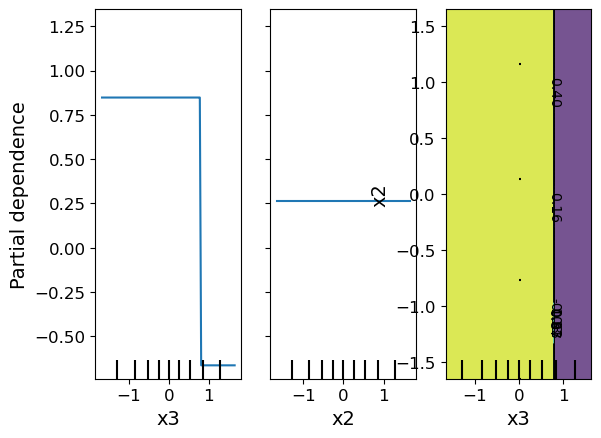

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.datasets import make_hastie_10_2
import matplotlib.pyplot as plt

X, y = make_hastie_10_2(random_state=0)


iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
PartialDependenceDisplay.from_estimator(mc_clf, X, features, target=0)
plt.show()

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
142                5.8               2.7                5.1               1.9
110                6.5               3.2                5.1               2.0
111                6.4               2.7                5.3               1.9
145                6.7               3.0                5.2               2.3
113                5.7               2.5                5.0               2.0
..                 ...               ...                ...               ...
83                 6.0               2.7                5.1               1.6
90                 5.5               2.6                4.4               1.2
80                 5.5               2.4                3.8               1.1
148                6.2               3.4                5.4               2.3
55                 5.7               2.8                4.5               1.3

[80 rows x 4 columns]
     sepal length (cm)  sepal width (cm) 

d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=150. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


2025/04/02 09:22:18 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "d:\Users\sean.ogara\.conda\envs\auto-ml\Lib\site-packages\mlflow\sklearn\utils.py:808: UserWarning: Top 50 child runs will be created based on ordering in rank_test_f1_macro column.  You can choose not to limit the number of child runs created by setting `max_tuning_runs=None`."
2025/04/02 09:22:18 INFO mlflow.sklearn.utils: Logging the 50 best runs, no runs will be omitted.


Creating evaluation plots
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
109                7.2               3.6                6.1               2.5
92                 5.8               2.6                4.0               1.2
52                 6.9               3.1                4.9               1.5
77                 6.7               3.0                5.0               1.7
78                 6.0               2.9                4.5               1.5
125                7.2               3.2                6.0               1.8
108                6.7               2.5                5.8               1.8
118                7.7               2.6                6.9               2.3
102                7.1               3.0                5.9               2.1
124                6.7               3.3                5.7               2.1
53                 5.5               2.3                4.0               1.3
123                6.3               2

NameError: name 'sns' is not defined

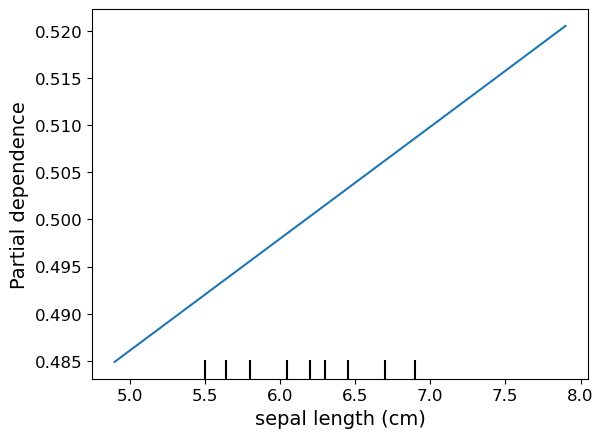

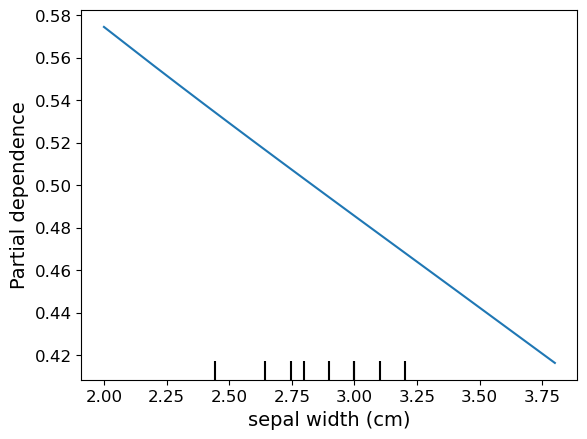

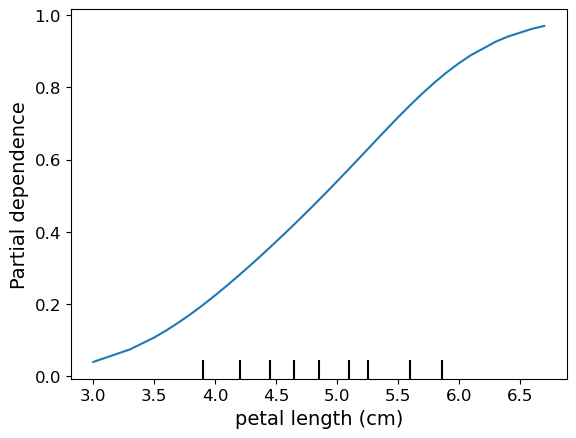

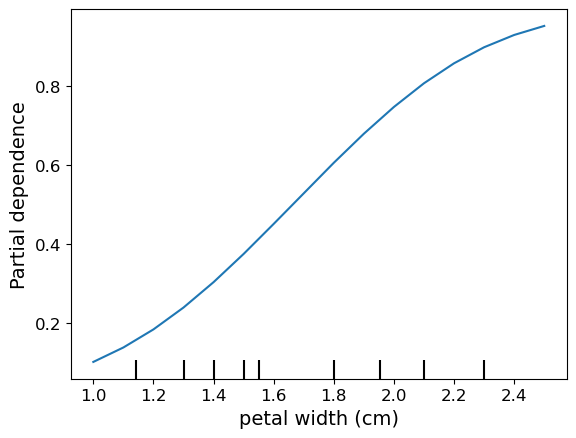

<Figure size 640x480 with 0 Axes>

In [ ]:
# target variables
target_var_list = ["target"]
# drop any unecessary variables from the model. In this case, we are dropping the geographical identifier.
drop_variables = []
# model dictionary and hyperparameter search space
model_param_dict = {
    LogisticRegression(): {},
    RandomForestClassifier(): {}
}
# optional controls:
# select features list - use to subset specific features of interest, if blank it will use all features.
# change feature_filter__filter_features hyperparam when using this
select_features_list = []
# optional - user specified model for evaluation plots. e.g. user_model = "Lasso"
# if left blank out the best performing model will be used for the evaluation plots
user_model = ""
# shortened feature name label for evaluation plots
col_labels = {}

# run pipeline for all models
for target_var in target_var_list:
    # pre-processing
    # drop cols, convert to set to drop unique cols only
    cols_to_drop = list(set([target_var] + drop_variables))
    features = preprocess_features(df=iris_data, cols_to_drop=cols_to_drop)
    target_df = preprocess_target(df=iris_data, target_col=target_var)

    # run model pipeline
    model_pipeline(
        model_param_dict=model_param_dict,
        target_var=target_var,
        target_df=target_df,
        feature_df=features,
        id_col="",
        original_df=iris_data,
        output_path="outputs",
        output_label="classification_demo",
        col_label_map=col_labels,
        user_evaluation_model=user_model,
    )
